# BackGround Knowledge

## Contents


   > - Forward Propagation
   > - Loss & Gradient Descent
   > - Backward Propagation

## Forward Propagation

<img src="img/neural_network.png" width=600/>

<img src="img/neural_network1.png" />

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [18]:

def simple_network(w_0,w_1,w_2,w_3,x_1,x_2,x_3):
    return w_1*x_1+w_2*x_2+w_3*x_3+w_0  ##Equals to nn.Linear(3,1,bias=True)

torch.manual_seed(0)  #<- Setting RANDOM value to CONSTANT
simple_linear=nn.Linear(3,1,bias=True) ##Same format as above network

for parameter in simple_linear.parameters(): #Print Parameters
    print(parameter)
    
    

Parameter containing:
tensor([[-0.0043,  0.3097, -0.4752]], requires_grad=True)
Parameter containing:
tensor([-0.4249], requires_grad=True)


In [3]:

sample_input=torch.tensor([3.,4.,6.])
predicted_output=simple_linear(sample_input)
print(predicted_output)

tensor([-2.0501], grad_fn=<AddBackward0>)


In [4]:
(3*-0.0043)+(4*0.3097)+(6*-0.4752)+(-0.4249) #Actual Cacluation

-2.0502

## Loss Curve & Gradient Descent

<img src="img/gradient_descent.png" width=600/>

**Regression Loss Type:**

   MSE,MAE   #MAE is robust to outlier MSE has easier gradient
   
**Classification Loss Type:**

   Hinge Loss, Cross Entropy
    
https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23    

In [5]:
y_true=torch.tensor(-2.)

$$
MSE=\frac{1}{n}\sum_{i=1}^{n} (y_i-x_i)^2
$$

In [6]:
loss=nn.MSELoss() #torch's loss function
print(loss(predicted_output,y_true))
print(loss(y_true,predicted_output))

tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MeanBackward0>)


C:\Users\HyunSeung\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\HyunSeung\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [7]:
(y_true-(predicted_output))**2

tensor([0.0025], grad_fn=<PowBackward0>)

## Gradient Descent

$$
J=loss=(y-\hat{y})^2=(y-(w_0x_0+w_1x_1+w_2x_2+w_3))^2
$$

$$
\frac{\partial J}{\partial w_0}=\frac{\partial (y-(w_0x_0+w_1x_1+w_2x_2+w_3))^2}{\partial w_0}
$$

$$
\frac{\partial J}{\partial w_0}=2(y-\hat{y})\times\frac{\partial}{\partial w_0}(y-(w_0x_0+w_1x_1+w_2x_2+w_3)
$$

$$
\frac{\partial J}{\partial w_0}=2(y-\hat{y})\times(-x_0),   w_0=w_0-LR \times  \frac{\partial J}{\partial w_0}
$$

$$
\frac{\partial J}{\partial w_0}=2(y-\hat{y})\times(-x_0), \frac{\partial J}{\partial w_1}=2(y-\hat{y})\times(-x_1)
$$

$$
\frac{\partial J}{\partial w_2}=2(y-\hat{y})\times(-x_2), \frac{\partial J}{\partial w_3}=2(y-\hat{y})\times(-1)
$$

$$
w_0=w_0-LR \times  \frac{\partial J}{\partial w_0}...
$$


In [8]:
lr=0.0005

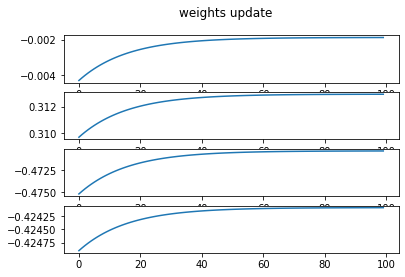

In [9]:
#Fixed Starting Point

w_0=-0.0043
w_1= 0.3097
w_2=-0.4752
w_3=-0.4249 
def func(w_0,w_1,w_2,w_3):
    return w_0*3.+w_1*4.+w_2*6.+w_3  ##Equals to nn.Linear(3,1,bias=True)

#Weight Update Variable

new_w_0=w_0
new_w_1=w_1
new_w_2=w_2
new_w_3=w_3

#Store checkpoints
w_0_list=[]
w_1_list=[]
w_2_list=[]
w_3_list=[]
loss_list=[]
output_val_list=[]
#Single training data and true value
sample_input=np.array([3.,4.,6.])
y_true=-2
#Defining Model

for i in range(100):
    #Save CheckPoint
    w_0_list.append(new_w_0) 
    w_1_list.append(new_w_1)
    w_2_list.append(new_w_2)
    w_3_list.append(new_w_3)
    
    #Forwarding
    pred=func(new_w_0,new_w_1,new_w_2,new_w_3)
    output_val_list.append(pred)
    
    #Calcuating Loss and Saving 
    loss=(y_true-(pred))**2
    loss_list.append(loss)
    #Update/Gradient Descent
    new_w_0=new_w_0-lr*2*(y_true-(pred))*(-sample_input[0])
    new_w_1=new_w_1-lr*2*(y_true-(pred))*(-sample_input[1])
    new_w_2=new_w_2-lr*2*(y_true-(pred))*(-sample_input[2])
    new_w_3=new_w_3-lr*2*(y_true-(pred))*(-1)
x=list(np.arange(0,100,1))
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4)
fig.suptitle('weights update')
ax1.plot(x, w_0_list)
ax2.plot(x, w_1_list)
ax3.plot(x, w_2_list)
ax4.plot(x, w_3_list)

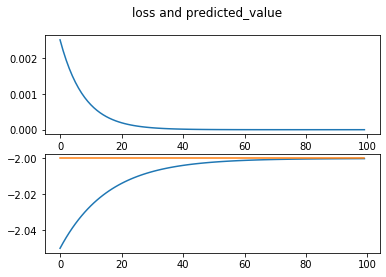

In [10]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('loss and predicted_value')
ax1.plot(x, loss_list)
ax2.plot(x, output_val_list)
ax2.plot(x, np.ones(100)*-2)

## Backward Propagation

https://www.jeremyjordan.me/neural-networks-training/

<center>Two Stage Network
</center>
<img src="img/step1.png" width=600/>



<center>Forwarding
</center>

<img src="img/step2.png" width=600/>


<center>Influence of $\theta_{11}^{(1)}$
    
</center>
<img src="img/step3.png" width=600/>


<img src="img/step4.png" width=600/>


#### Where the term "backpropgation" came from
<p float="center">
<img src="img/step5.png" width=450/>
   <img src="img/step1.png" width=450/>
<p float="left">

In [14]:

#With One Gradient Variable
a=torch.tensor(3.,requires_grad=True)
b=torch.tensor(4.,)
add=a+b
multi=a*b
loss=nn.MSELoss()
loss_val=loss(a,b)
print(add,multi,loss_val)
add.backward()
multi.backward()
loss_val.backward()

tensor(7., grad_fn=<AddBackward0>) tensor(12., grad_fn=<MulBackward0>) tensor(1., grad_fn=<MseLossBackward>)


tensor(3., requires_grad=True)

In [12]:
a=torch.tensor(3.)
b=torch.tensor(4.)
add=a+b
multi=a*b
loss=nn.MSELoss()
loss_val=loss(a,b)
print(add,multi,loss_val)

tensor(7.) tensor(12.) tensor(1.)


In [13]:
add.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

<p float="center">
<img src="img/manual_code.png" ,height=200, width=500/>
<img src="img/torch_code.png" ,height=200, width=400/>

</p >